<a href="https://colab.research.google.com/github/ShauryaK0303/TASK-1-SPAM-CLASSIFICATION/blob/main/LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AIM**
Implement the Item-Item based
collaborative filtering and suggest recommendation for the users.

Calculate Prediction for a particular user by using method of Cosine
similarity , Euclidean distance and Pearson correlation on Item-Item based
collaborative filtering.

#**INTRODUCTION**
tem-Based Collaborative Filtering (Item-Based CF) is a recommendation technique that identifies relationships between items to suggest products or content to users.The method evaluates past user interactions (e.g., ratings, purchases, or views) to calculate similarity scores between items using metrics like cosine similarity or Pearson correlation. These scores are then used to recommend items that are most similar to those a user has interacted with.

#**THEORY**
Item-Based Collaborative Filtering (Item-Based CF) is a recommendation technique that predicts a user’s preference for an item by analyzing its similarity to items the user has previously interacted with. It relies on a user-item interaction matrix to compute similarities between items using measures like cosine similarity or Pearson correlation. These similarity scores are then used to recommend items similar to those a user has rated or purchased. The method is computationally efficient since item similarities can be precomputed, making it scalable for large datasets. However, it faces challenges such as the cold start problem for new items and data sparsity in the interaction matrix.

#**REPRESENTATION**
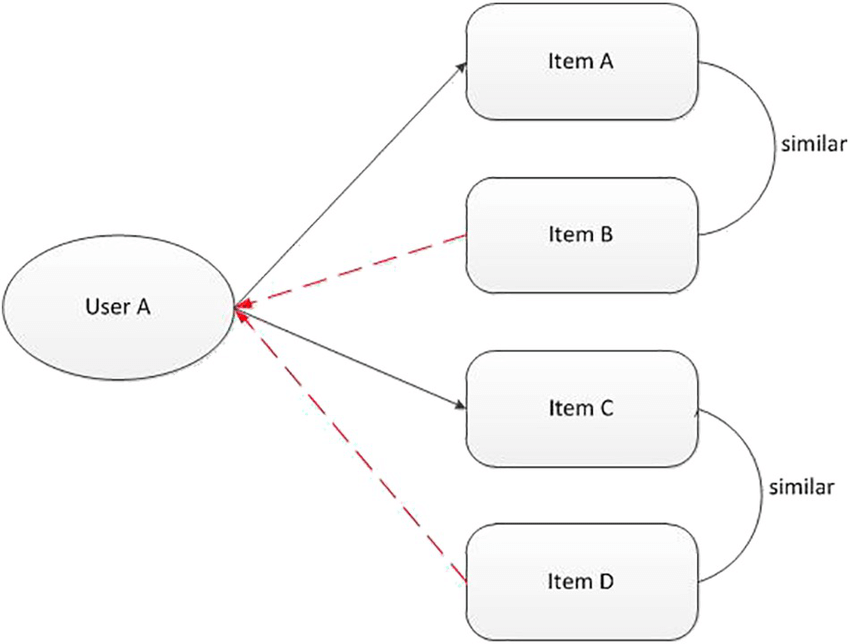

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [ ]:

movies = pd.read_csv('/content/drive/MyDrive/Recommender_System/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Recommender_System/ratings.csv')

In [ ]:

# user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')
user_item_matrix = ratings.pivot(index='movieId', columns='userId', values='rating')
print(user_item_matrix.head())

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  NaN  NaN  NaN  4.0  NaN  4.5  NaN  NaN  NaN  ...  4.0  NaN  4.0   
2        NaN  NaN  NaN  NaN  NaN  4.0  NaN  4.0  NaN  NaN  ...  NaN  4.0  NaN   
3        4.0  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4        NaN  NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
5        NaN  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

userId   604  605  606  607  608  609  610  
movieId                                     
1        3.0  4.0  2.5  4.0  2.5  3.0  5.0  
2        5.0  3.5  NaN  NaN  2.0  NaN  NaN  
3        NaN  NaN  NaN  NaN  2.0  NaN  NaN  
4        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5        3.0  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 610 columns]


In [ ]:
# Fill missing values with 0
user_item_matrix_filled = user_item_matrix.fillna(0)
print(user_item_matrix_filled.head())

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  0.0  0.0  0.0  4.0  0.0  4.5  0.0  0.0  0.0  ...  4.0  0.0  4.0   
2        0.0  0.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0  0.0  ...  0.0  4.0  0.0   
3        4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

userId   604  605  606  607  608  609  610  
movieId                                     
1        3.0  4.0  2.5  4.0  2.5  3.0  5.0  
2        5.0  3.5  0.0  0.0  2.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  2.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5        3.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 610 columns]


In [ ]:
item_similarity = cosine_similarity(user_item_matrix_filled)
print(item_similarity)

[[1.         0.41056206 0.2969169  ... 0.         0.         0.        ]
 [0.41056206 1.         0.28243799 ... 0.         0.         0.        ]
 [0.2969169  0.28243799 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         1.         0.        ]
 [0.         0.         0.         ... 1.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
print(item_similarity_df.head(10))

movieId    1         2         3         4         5         6         7       \
movieId                                                                         
1        1.000000  0.410562  0.296917  0.035573  0.308762  0.376316  0.277491   
2        0.410562  1.000000  0.282438  0.106415  0.287795  0.297009  0.228576   
3        0.296917  0.282438  1.000000  0.092406  0.417802  0.284257  0.402831   
4        0.035573  0.106415  0.092406  1.000000  0.188376  0.089685  0.275035   
5        0.308762  0.287795  0.417802  0.188376  1.000000  0.298969  0.474002   
6        0.376316  0.297009  0.284257  0.089685  0.298969  1.000000  0.244105   
7        0.277491  0.228576  0.402831  0.275035  0.474002  0.244105  1.000000   
8        0.131629  0.172498  0.313434  0.158022  0.283523  0.147562  0.273757   
9        0.232586  0.044835  0.304840  0.000000  0.335058  0.214088  0.162000   
10       0.395573  0.417693  0.242954  0.095598  0.218061  0.386414  0.238949   

movieId    8         9     

In [ ]:
sim_scores = item_similarity_df[1]
print(sim_scores)

movieId
1         1.000000
2         0.410562
3         0.296917
4         0.035573
5         0.308762
            ...   
193581    0.000000
193583    0.000000
193585    0.000000
193587    0.000000
193609    0.000000
Name: 1, Length: 9724, dtype: float64


In [ ]:
# Create an empty DataFrame for storing predicted ratings
item_predicted_ratings = pd.DataFrame(index=user_item_matrix.index, columns=user_item_matrix.columns)

# Iterate over all users
for item in user_item_matrix.index:
    # Get the similarity scores for this user
    sim_scores = item_similarity_df[item]
    # Calculate the weighted sum of ratings for each item
    weighted_sum = sim_scores.values @ user_item_matrix_filled
    # Calculate the sum of similarity scores
    sim_sum = np.abs(sim_scores).sum()
    # Predict the ratings
    item_predicted_ratings.loc[item] = weighted_sum / sim_sum

In [ ]:
print(item_predicted_ratings.head(2))

userId        1         2         3         4         5         6         7    \
movieId                                                                         
1         0.30857  0.026045   0.01073  0.184688   0.05968  0.236576  0.168357   
2        0.268884   0.02502  0.009925  0.145138  0.055823  0.279904  0.151936   

userId        8         9         10   ...       601       602       603  \
movieId                                ...                                 
1        0.068183  0.033481  0.091989  ...  0.143694  0.140196  0.623911   
2        0.073002  0.030648  0.093666  ...  0.119678  0.145819   0.44207   

userId        604       605       606       607       608       609       610  
movieId                                                                        
1        0.097223  0.186212  0.720652  0.218566  0.692543  0.039539  0.936516  
2        0.110544  0.195339   0.59833  0.189135  0.676696  0.035935  0.833696  

[2 rows x 610 columns]


In [ ]:
def recommend_items(item_id, num_recommendations=10):
    # Get the predicted ratings for the user
    item_ratings = item_predicted_ratings.loc[item_id].sort_values(ascending=False)
    # Filter out items the user has already rated
    already_rated = user_item_matrix.loc[item].dropna().index
    recommendations = item_ratings.drop(already_rated)
    return recommendations.head(num_recommendations)

In [ ]:
# Get recommendations for a item (e.g., item with ID 1)
print(recommend_items(1))

userId
414    1.765551
474    1.256445
599    1.200661
448    1.062058
380    1.039901
274    0.993852
68     0.982171
610    0.936516
249    0.852197
288    0.814158
Name: 1, dtype: object


#**ANALYSIS & CONCLUSION**
Item-Based Collaborative Filtering (CF) is a powerful and widely adopted technique in recommendation systems due to its ability to identify meaningful relationships between items. Its efficiency stems from precomputing item similarities.However, the method's reliance on past user interactions introduces challenges like the cold start problem, where new items without prior data cannot be recommended, and data sparsity, which can reduce accuracy in systems with limited user-item interactions. Furthermore, the assumption that user preferences remain static over time might not always align with real-world dynamics.

In conclusion, while Item-Based CF is a robust technique for generating personalized recommendations, its performance can be enhanced by integrating complementary approaches, such as content-based filtering or hybrid models, to address its limitations.